In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score

In [ ]:
df1=pd.read_csv('takehome_user_engagement.csv')
df1.head()

,time_stamp,user_id,visited
0,2014-04-22 03:53:30,1,1
1,2013-11-15 03:45:04,2,1
2,2013-11-29 03:45:04,2,1
3,2013-12-09 03:45:04,2,1
4,2013-12-25 03:45:04,2,1


In [ ]:
df1.shape

(207917, 3)

In [ ]:
df1.isnull().sum()

time_stamp    0
user_id       0
visited       0
dtype: int64

In [ ]:
df1.drop_duplicates(inplace=True)

In [ ]:
df1.shape

(207917, 3)

In [ ]:
df1.dtypes

time_stamp    object
user_id        int64
visited        int64
dtype: object

In [ ]:
df1['time_stamp']=pd.to_datetime(df1['time_stamp'])
df1.head()

,time_stamp,user_id,visited
0,2014-04-22 03:53:30,1,1
1,2013-11-15 03:45:04,2,1
2,2013-11-29 03:45:04,2,1
3,2013-12-09 03:45:04,2,1
4,2013-12-25 03:45:04,2,1


In [ ]:
df1_years=df1.groupby(df1['time_stamp'].dt.year).count()
df1_years

,time_stamp,user_id,visited
time_stamp,,,
2012,11855,11855,11855
2013,105725,105725,105725
2014,90337,90337,90337


In [ ]:
# grouping one day data to 1w to see the count of visited
df1=df1.groupby([pd.Grouper(key='time_stamp', freq='1W'),'user_id']).count()
df1.head()

visited
time_stamp user_id         
2012-06-03 563            1
           1693           1
           1995           1
           2120           1
           2136           1

In [ ]:
# users logged in in 3 separate days in atleast one week
df1=df1[df1["visited"]==3]
df1.shape

(9415, 1)

In [ ]:
# the userid members are considered as adopted users 
s=set()
for i,j in df1.index:
    s.add(j)


In [ ]:
df2=pd.read_csv('/content/takehome_users.csv',encoding='latin')
df2.head()

,object_id,creation_time,name,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id
0,1,2014-04-22 03:53:30,Clausen August,AugustCClausen@yahoo.com,GUEST_INVITE,1.398139e+09,1,0,11,10803.0
1,2,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,1.396238e+09,0,0,1,316.0
2,3,2013-03-19 23:14:52,Bottrill Mitchell,MitchellBottrill@gustr.com,ORG_INVITE,1.363735e+09,0,0,94,1525.0
3,4,2013-05-21 08:09:28,Clausen Nicklas,NicklasSClausen@yahoo.com,GUEST_INVITE,1.369210e+09,0,0,1,5151.0
4,5,2013-01-17 10:14:20,Raw Grace,GraceRaw@yahoo.com,GUEST_INVITE,1.358850e+09,0,0,193,5240.0


In [ ]:
df2.isnull().sum()

object_id                        0
creation_time                    0
name                             0
email                            0
creation_source                  0
last_session_creation_time    3177
opted_in_to_mailing_list         0
enabled_for_marketing_drip       0
org_id                           0
invited_by_user_id            5583
dtype: int64

In [ ]:
df2['last_session_creation_time'].fillna(df2['last_session_creation_time'].mean(), inplace=True)
df2.isnull().sum()

object_id                        0
creation_time                    0
name                             0
email                            0
creation_source                  0
last_session_creation_time       0
opted_in_to_mailing_list         0
enabled_for_marketing_drip       0
org_id                           0
invited_by_user_id            5583
dtype: int64

In [ ]:
#making null to 0 where there are no user invited by existing user
df2['invited_by_user_id'].fillna(0, inplace=True)
df2.isnull().sum()

object_id                     0
creation_time                 0
name                          0
email                         0
creation_source               0
last_session_creation_time    0
opted_in_to_mailing_list      0
enabled_for_marketing_drip    0
org_id                        0
invited_by_user_id            0
dtype: int64

In [ ]:
df2.dtypes


object_id                       int64
creation_time                  object
name                           object
email                          object
creation_source                object
last_session_creation_time    float64
opted_in_to_mailing_list        int64
enabled_for_marketing_drip      int64
org_id                          int64
invited_by_user_id            float64
dtype: object

In [ ]:
df2["adopted_user"]=0
df2.loc[s,"adopted_user"]=1
df2

,object_id,creation_time,name,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id,adopted_user
0,1,2014-04-22 03:53:30,Clausen August,AugustCClausen@yahoo.com,GUEST_INVITE,1.398139e+09,1,0,11,10803.0,0
1,2,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,1.396238e+09,0,0,1,316.0,0
2,3,2013-03-19 23:14:52,Bottrill Mitchell,MitchellBottrill@gustr.com,ORG_INVITE,1.363735e+09,0,0,94,1525.0,1
3,4,2013-05-21 08:09:28,Clausen Nicklas,NicklasSClausen@yahoo.com,GUEST_INVITE,1.369210e+09,0,0,1,5151.0,0
4,5,2013-01-17 10:14:20,Raw Grace,GraceRaw@yahoo.com,GUEST_INVITE,1.358850e+09,0,0,193,5240.0,0
...,...,...,...,...,...,...,...,...,...,...,...
11995,11996,2013-09-06 06:14:15,Meier Sophia,SophiaMeier@gustr.com,ORG_INVITE,1.378448e+09,0,0,89,8263.0,0
11996,11997,2013-01-10 18:28:37,Fisher Amelie,AmelieFisher@gmail.com,SIGNUP_GOOGLE_AUTH,1.358275e+09,0,0,200,0.0,0
11997,11998,2014-04-27 12:45:16,Haynes Jake,JakeHaynes@cuvox.de,GUEST_INVITE,1.398603e+09,1,1,83,8074.0,0
11998,11999,2012-05-31 11:55:59,Faber Annett,mhaerzxp@iuxiw.com,PERSONAL_PROJECTS,1.338638e+09,0,0,6,0.0,0


In [ ]:
df2.drop(["name","email","creation_time"],inplace=True,axis=1)

In [ ]:
df2.head()

,object_id,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id,adopted_user
0,1,GUEST_INVITE,1.398139e+09,1,0,11,10803.0,0
1,2,ORG_INVITE,1.396238e+09,0,0,1,316.0,0
2,3,ORG_INVITE,1.363735e+09,0,0,94,1525.0,1
3,4,GUEST_INVITE,1.369210e+09,0,0,1,5151.0,0
4,5,GUEST_INVITE,1.358850e+09,0,0,193,5240.0,0


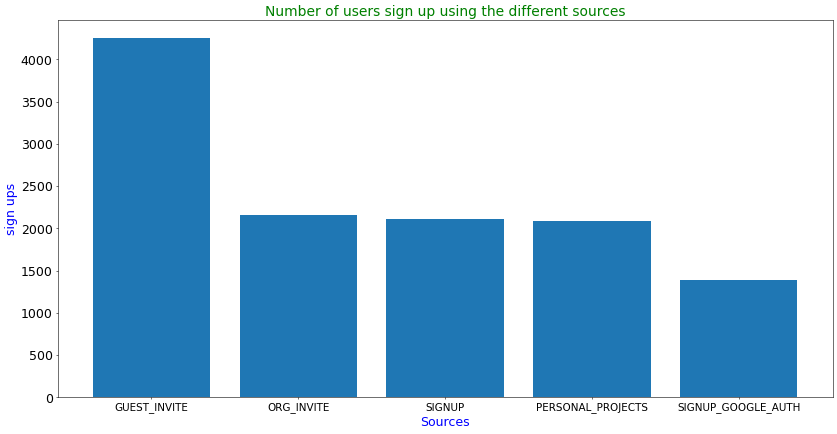

In [ ]:
x=df2['creation_source'].unique()
y=df2['creation_source'].value_counts()
plt.figure(figsize=(20,10),dpi=50)
plt.bar(x,height=y)
plt.xticks(fontsize=15)
plt.yticks(fontsize=18)
plt.title('Number of users sign up using the different sources',fontsize=20,color='g')
plt.xlabel('Sources',fontsize=18,color='b')
plt.ylabel('sign ups',fontsize=18,color='b')
plt.show()

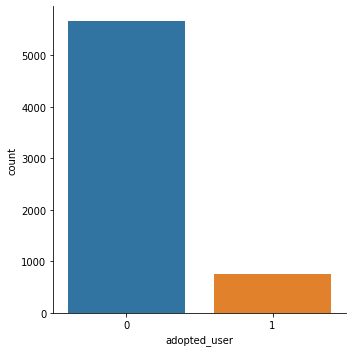

In [ ]:
sns.catplot(x="adopted_user",kind="count",data=df2[df2["invited_by_user_id"]!=0])

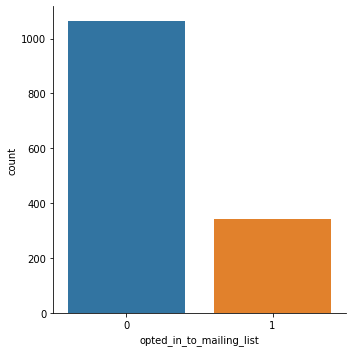

In [ ]:
sns.catplot(x="opted_in_to_mailing_list",kind="count",data=df2[df2["adopted_user"]==1])

In [ ]:
rows_user_inv=df2[(df2["invited_by_user_id"]!=0) & (df2["adopted_user"]==1)].shape[0]
rows_adopted=df2[df2['invited_by_user_id']!=0].shape[0]
perc=(rows_user_inv/rows_adopted)
print('percentage of adopted users by invite is: ',round(perc*100,2),'%')

percentage of adopted users by invite is:  11.7 %


In [ ]:
n=[]
for i in df2["org_id"].unique():
    a=df2[ (df2["adopted_user"]==1) & (df2["org_id"]==i) ].shape[0]
    d=df2[df2["org_id"]==i].shape[0]
    n.append((i,round(a/d*100,2)))

In [ ]:
n.sort(key=lambda x:x[1],reverse=True)


In [ ]:
for i,j in n[:10]:
  print(f'Group {i} has {j}% of adopted user.')

Group 252 has 37.5% of adopted user.
Group 350 has 36.0% of adopted user.
Group 140 has 34.78% of adopted user.
Group 346 has 33.33% of adopted user.
Group 396 has 33.33% of adopted user.
Group 73 has 32.26% of adopted user.
Group 383 has 30.77% of adopted user.
Group 305 has 30.77% of adopted user.
Group 414 has 30.0% of adopted user.
Group 352 has 30.0% of adopted user.


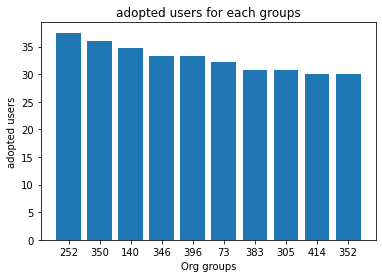

In [ ]:
x=[str(i) for i, j in n[:10]]
y=[j for i,j in n[0:10]]
plt.bar(x,height=y)
plt.title('adopted users for each groups')
plt.xlabel('Org groups')
plt.ylabel('adopted users')
plt.show()

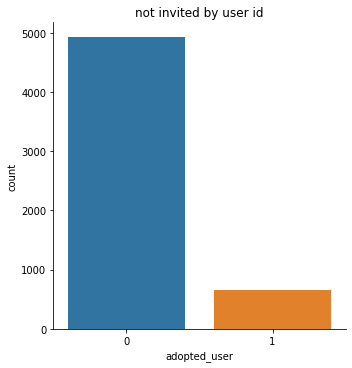

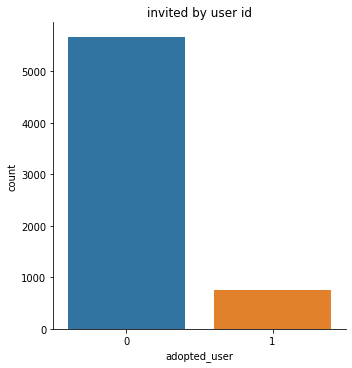

In [ ]:
sns.catplot(x="adopted_user",kind="count",data=df2[df2["invited_by_user_id"]==0])
plt.title("not invited by user id")
plt.show()
sns.catplot(x="adopted_user",kind="count",data=df2[df2["invited_by_user_id"]!=0])
plt.title("invited by user id")
plt.show()

In [ ]:
df2=pd.get_dummies(df2,"creation_source",drop_first=True)

In [ ]:
df2.head()

,object_id,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id,adopted_user,creation_source_ORG_INVITE,creation_source_PERSONAL_PROJECTS,creation_source_SIGNUP,creation_source_SIGNUP_GOOGLE_AUTH
0,1,1.398139e+09,1,0,11,10803.0,0,0,0,0,0
1,2,1.396238e+09,0,0,1,316.0,0,1,0,0,0
2,3,1.363735e+09,0,0,94,1525.0,1,1,0,0,0
3,4,1.369210e+09,0,0,1,5151.0,0,0,0,0,0
4,5,1.358850e+09,0,0,193,5240.0,0,0,0,0,0


In [ ]:
x=df2.drop("adopted_user",axis=1)
y=df2["adopted_user"]

In [ ]:
y.value_counts()

0    10595
1     1405
Name: adopted_user, dtype: int64

In [ ]:
from imblearn.over_sampling import SMOTE
smote=SMOTE( sampling_strategy="minority")

In [ ]:
balanced_x,balanced_y= smote.fit_resample(x,y)

In [ ]:
balanced_y.value_counts()

0    10595
1    10595
Name: adopted_user, dtype: int64

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(balanced_x,balanced_y,random_state=20,test_size=.30)

In [ ]:
len(x_train),len(x_test)

(14833, 6357)

In [ ]:
y_test.value_counts()

0    3182
1    3175
Name: adopted_user, dtype: int64

In [ ]:
# lets normalise the data
st=StandardScaler()
st.fit(x_train)
x_train=st.transform(x_train)
x_test=st.transform(x_test)

In [ ]:
lr=LogisticRegression()
lr.fit(x_train,y_train)

LogisticRegression()

In [ ]:
train_score=cross_val_score(lr,x_train,y_train,scoring="roc_auc")
print("the AUC score for training data:",train_score.mean())

the AUC score for training data: 0.7965704979471895


In [ ]:
from sklearn.metrics import classification_report,roc_curve,roc_auc_score

In [ ]:
y_pred=lr.predict(x_test)

In [ ]:
print(classification_report(y_pred=y_pred,y_true=y_test,target_names=["not adopted","adopted"]))

              precision    recall  f1-score   support

 not adopted       0.69      0.82      0.75      3182
     adopted       0.78      0.63      0.70      3175

    accuracy                           0.73      6357
   macro avg       0.74      0.73      0.72      6357
weighted avg       0.74      0.73      0.72      6357



In [ ]:
y_pred_proba=lr.predict_proba(x_test)

In [ ]:
y_pred_proba[:,1]

array([0.32925122, 0.16363903, 0.13332252, ..., 0.42584184, 0.33394131,
       0.87204231])

In [ ]:
fpr, tpr, thresholds=roc_curve(y_test,y_pred_proba[:,1])

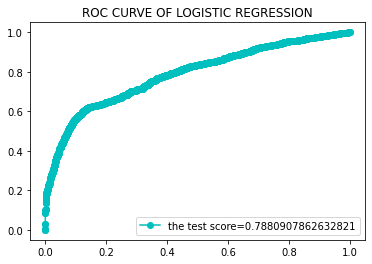

In [ ]:
score=roc_auc_score(y_test,y_pred_proba[:,1])
plt.plot(fpr, tpr,drawstyle="steps-post",marker="o",label=f"the test score={score}",color="c")
plt.legend(loc='lower right')
plt.title("ROC CURVE OF LOGISTIC REGRESSION")
plt.show()

In [ ]:
lr.coef_

array([[ 0.02619166, -0.01679796, -0.38364153, -0.14194668, -0.00451672,
        -0.47136695, -0.79238358, -0.82231148, -0.92518111, -0.8060119 ]])

In [ ]:
result=[*zip(x.columns,(abs(lr.coef_[0])*100))]
result.sort(reverse=True,key=lambda x:abs(x[1]))
final=pd.DataFrame({"features":[i for i,j in result],"Their importance":[j for i,j in result]})

In [ ]:
final[final['Their importance']>80]

,features,Their importance
0,creation_source_SIGNUP,92.518111
1,creation_source_PERSONAL_PROJECTS,82.231148
2,creation_source_SIGNUP_GOOGLE_AUTH,80.601190


# **The  factors  predict  future  user adoption are Signups and Personal Projects.**